### Cifar - 10 이미지 분류 v1

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(2022)
tf.random.set_seed(2022)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

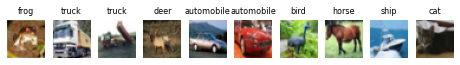

In [4]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(8,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i]), plt.axis('off')
  plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [5]:
# X data : 0~1 사이의 실수(float32)로 변환, float 변환을 안 할시 64비트로 처리
X_train = X_train.astype('float32')/255.
X_test = X_test.astype(np.float32)/255.

In [6]:
# y data : one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [8]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),  #padding=32
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [9]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model_path = 'best-cifar10-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [11]:
hist = model.fit(
    X_train, Y_train, batch_size=32, epochs=100, verbose=2, validation_split=0.2, callbacks=[checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.63709, saving model to best-cifar10-v1.h5
1250/1250 - 22s - loss: 1.8870 - accuracy: 0.3037 - val_loss: 1.6371 - val_accuracy: 0.4047 - 22s/epoch - 17ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 1.63709 to 1.45232, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.5873 - accuracy: 0.4191 - val_loss: 1.4523 - val_accuracy: 0.4761 - 6s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 1.45232 to 1.34480, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.4590 - accuracy: 0.4686 - val_loss: 1.3448 - val_accuracy: 0.5236 - 6s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 1.34480 to 1.28667, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.3709 - accuracy: 0.5076 - val_loss: 1.2867 - val_accuracy: 0.5401 - 6s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 1.28667 to 1.27504, saving model to best-cifar10-v1.h5
1250/1250 - 6s - loss: 1.3017

In [16]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6492 - accuracy: 0.7821


[0.6491860151290894, 0.7821000218391418]

- 학습과정 시각화

In [17]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_accuracy']
xs = np.arange(1, len(y_acc)+1)

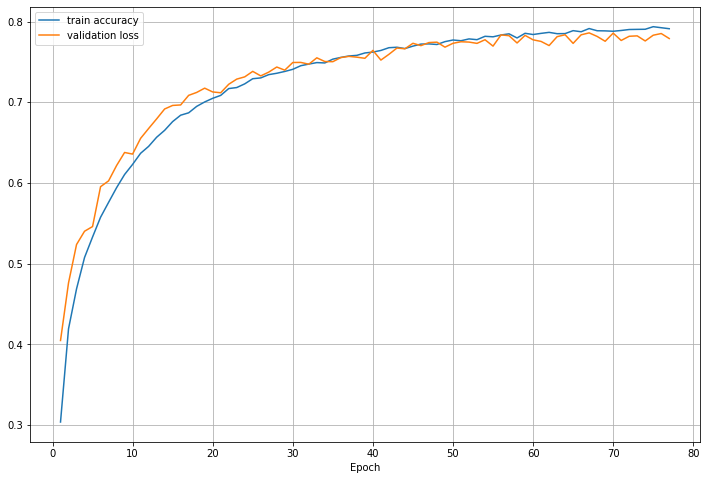

In [18]:
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()